# Direct sampling

- Imagine I have a uniform random number generator giving number according to

  \begin{equation*}
  \pi_\mathrm{uni}(x) = \begin{cases}
  1 & \text{for} \quad 0 \le x < 1 \\
  0 & \text{otherwise}
  \end{cases}
  \end{equation*}

- `numpy.random.rand()` generates such numbers.

- How do I generate new distribution functions?

- In some cases, this can be done and *independent* random variable are
  obtained.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('style.mpl')

# Tower sampling

- Tower sampling allows to sample a discrete distribution.

- We want to pick a number $\{1, 2, \ldots, n\}$ with corresponding
  probabilities $\{ \pi_1, \pi_2, \ldots, \pi_n \}$.

- Construct the cumulative distribution $\Pi_\ell = \sum_{i=1}^\ell \pi_i$
  for $0 \le \ell \le n$.
  We have $\Pi_n = 1$.

- Draw a uniform random number $\mu$ in $[0, 1[$.

- Find $k$ such that $\Pi_{k-1} \le \mu < \Pi_k$.

- The $k$'s are distributed according to $\pi_k$.

- Below is a simple implementation of tower sampling.

- It can be improved by sorting the $\pi_i$.

In [2]:
def tower_sampling(π):
    Π = np.cumsum(π) # cumulative sum
    μ = np.random.rand() # random number in [0,1[
    k = 0
    while True: # find k
        if Π[k] > μ: break
        k = k+1
    return k+1

In [3]:
π = [0.2, 0.1, 0.4, 0.15, 0.15]
n_samples = 2**14
samples = [tower_sampling(π) for i in range(n_samples)]

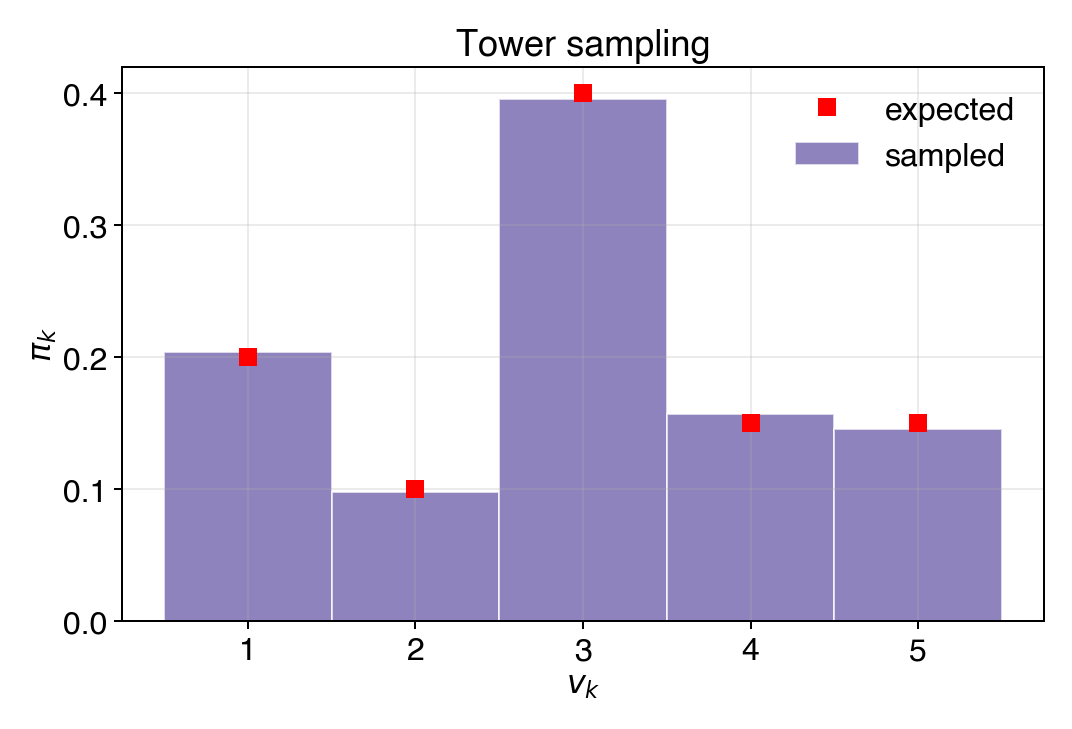

In [4]:
fig, ax = plt.subplots()
ax.hist(samples, bins=np.arange(0.5,6.5,1), ec='w', alpha=0.7, density=True, label="sampled");
ax.plot(np.arange(1,6), π, 'sr', label="expected")
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlabel("$v_k$")
ax.set_ylabel("$\pi_k$");
ax.set_title("Tower sampling");

# Continuous distribution

- Let's try to extend the tower sampling to continuous distributions.
  Discrete indices become continuous varialbles

  \begin{equation*}
  \{k, \pi_k\} \quad \to \quad \{x,\pi(x)\}
  \end{equation*}

- Cumulative distribution function

  \begin{equation*}
  \Pi_k \quad \to \quad \Pi(x) = \int_{-\infty}^x \pi(y) dy
  \end{equation*}

- Draw a uniform random number $\mu \in [0, 1[$.

- The original condition to find $k$ such that $\Pi_{k-1} \le \mu < \Pi_k$ now becomes
  finding $x$ such that $\Pi(x) = \mu$, i.e.
  
  \begin{equation*}
  x = \Pi^{-1}(\mu)
  \end{equation*}

- The sampled $x$'s are distributed according to $\pi(x)$.

- Unfortunately it is usually very difficult to find $\Pi^{-1}$.

# Example (trivial)

- Let's start from a very simple example, a uniform distribution
  over $[a, b[$
  
    \begin{equation*}
    \pi(x) =
    \begin{cases}
    \frac{1}{b-a} & \text{for} \quad a \le x < b \\
    0 & \text{otherwise} 
    \end{cases}
    \end{equation*}

- The cumulative distribution function is

  \begin{equation*}
  \Pi(x) = \int_a^x \pi(y) dy = \frac{x - a}{b - a}
  \qquad \Pi^{-1}(\mu) = a + (b-a) \mu
  \end{equation*}

- $x$ will be sampled according to $\pi(x)$ if it is computed from a
  uniform $\mu \in [0,1[$ with

  \begin{equation*}
  x = a + (b-a) \mu
  \end{equation*}

# Example

- Let us try to sample the exponential distribution for $x \ge 0$

  \begin{equation*}
  \pi(x) = \lambda \mathrm{e}^{-\lambda x}
  \end{equation*}

- The cumulative distribution function is

  \begin{equation*}
    \Pi(x) =\int_0^x \pi(y) dy = \left.-\mathrm{e}^{-\lambda y} \right \rvert_0^x = 1 - \mathrm{e}^{-\lambda x}
    \qquad
    \Pi^{-1}(\mu) = -\frac{1}{\lambda} \ln(1 - \mu)
  \end{equation*}
  
- The distributions of $1-\mu$ and $\mu$ are the same, so we can sample
  $x$ using
  
  \begin{equation*}
     x = -\frac{1}{\lambda} \ln(\mu)
  \end{equation*}

In [5]:
λ = 0.5
n_samples = 2**14
samples = -np.log(np.random.rand(n_samples)) / λ

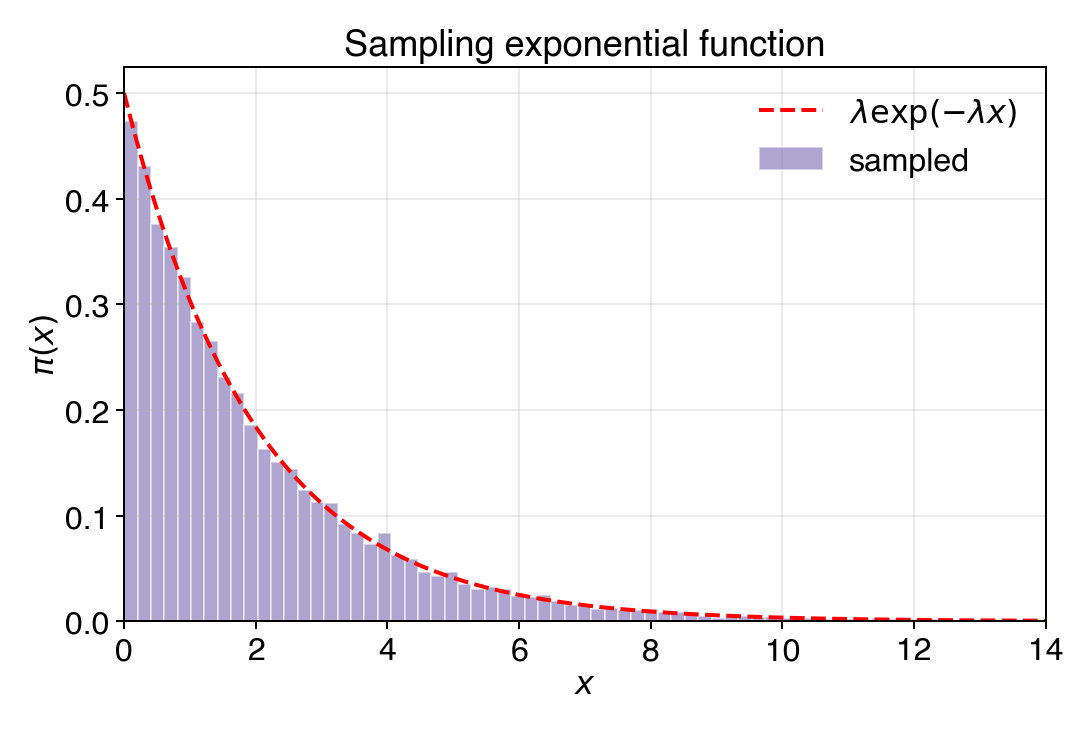

In [6]:
fig, ax = plt.subplots()
xr = np.linspace(0, 14, 1000)
ax.hist(samples, bins=100, density=True, ec='w', alpha=0.5, label="sampled");
ax.plot(xr, λ * np.exp(-λ * xr), '--', color='red', label="$\lambda \exp(-\lambda x)$")
ax.grid(alpha=0.3)
ax.set_xlim(0, 14)
ax.set_xlabel("$x$")
ax.set_ylabel("$\pi(x)$");
ax.set_title("Sampling exponential function");
ax.legend();

# Summary

- Similar tricks allow to generate the most common simple distributions, such
  as the normal distribution, etc.

- Generators for these distributions are available in libraries, e.g. `numpy.random`.

- The values are all independent and often the generation is fast.

- However, one must be able to invert the cumulative distribution function,
  which is in general very difficult.

# Outline
    
- [Introduction to Monte Carlo](01-intro_monte_carlo.slides.html)

- [Newton–Cotes quadrature](02-newton_cotes.slides.html)
  
- [Importance sampling](03-importance_sampling.slides.html)

- [Direct sampling methods](04-direct_sampling.slides.html)

- [Markov chain sampling and balance condition](05-markov_chain.slides.html)

- [Metropolis-Hastings algorithm](06-metropolis_hastings.slides.html)

- [The two-dimensional Ising model](07-ising.slides.html)

- [Error bar analysis](08-error_analysis.slides.html)
  
- [References](09-references.slides.html)